In [236]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from datetime import date, timedelta

In [237]:
START = "2014-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

my_ticker = ('RR.L', 'AZN.L', 'VOD.L', 'BHP.L', 'HSBA.L', 'IHG.L', 'KGF.L','SHEL.L', 'TSCO.L', 'STAN.L',
          'SGRO.L', 'ULVR.L', 'JD.L', 'MNDI.L', 'PSON.L', 'PHNX.L', 'RIO.L', 'REL.L', 'ADM.L', 'ABF.L', 'AV.L')

In [238]:

# Initialize an empty dictionary to store the data
data_dict = {}

# Loop through each ticker, download its data, and store it in the dictionary
for ticker in my_ticker:
    stock_data = yf.download(ticker, START, TODAY)
    data_dict[ticker] = stock_data
    print(f"Stock data for {ticker}")
    display(stock_data.head())  # Display the first few rows of the dataframe

# Now, data_dict contains the stock data for each ticker

[*********************100%%**********************]  1 of 1 completed

Stock data for RR.L


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,438.225708,438.445404,432.621796,434.450897,392.776123,5188161
2014-01-03,433.764496,437.539398,433.421387,436.166687,394.327332,4021398
2014-01-06,436.509888,444.059601,435.480408,442.343689,399.911865,7425143
2014-01-07,440.627899,443.575714,437.196198,442.343689,399.911865,9110958
2014-01-08,442.343689,442.467285,436.166687,441.314209,398.981171,8518816


[*********************100%%**********************]  1 of 1 completed

Stock data for AZN.L


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,3566.0,3592.500000,3545.5,3558.0,2471.132080,1966575
2014-01-03,3561.5,3604.000000,3554.0,3585.5,2490.232178,3886099
2014-01-06,3579.0,3607.850098,3579.0,3598.5,2499.260742,2272678
2014-01-07,3584.0,3591.000000,3557.0,3562.5,2474.257812,2948814
2014-01-08,3558.0,3571.500000,3539.5,3549.5,2465.229004,2071328


[*********************100%%**********************]  1 of 1 completed

Stock data for VOD.L


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,247.573502,248.681793,246.501694,247.312805,115.624847,37257073
2014-01-03,246.947906,247.886307,245.748901,245.748901,114.893661,35667986
2014-01-06,244.810501,247.104294,243.298706,245.800995,114.918022,51511537
2014-01-07,245.644608,248.713104,245.644608,248.042694,115.966049,37780007
2014-01-08,247.208603,250.576294,245.853104,246.061707,115.039917,53800544


[*********************100%%**********************]  1 of 1 completed

Stock data for BHP.L


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,1877.0,1877.000000,1835.00000,1852.0,948.273376,5062171
2014-01-03,1853.0,1862.375977,1831.81897,1857.5,951.089417,3239823
2014-01-06,1850.0,1862.000000,1824.50000,1828.5,936.240662,4928338
2014-01-07,1828.5,1848.000000,1814.50000,1828.5,936.240662,4353601
2014-01-08,1822.0,1836.000000,1806.50000,1811.0,927.280334,5760266


[*********************100%%**********************]  1 of 1 completed

Stock data for HSBA.L


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,658.400024,661.200012,654.599976,659.700012,367.373810,15181957
2014-01-03,653.000000,659.388000,649.796997,656.400024,365.536011,15846261
2014-01-06,658.099976,664.299988,656.388000,660.000000,367.540802,26415293
2014-01-07,659.799988,678.400024,659.599976,675.799988,376.339539,31453649
2014-01-08,673.099976,677.940979,671.911011,674.500000,375.615509,24154793


[*********************100%%**********************]  1 of 1 completed

Stock data for IHG.L


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,2877.059814,2891.506592,2851.333496,2871.343018,1741.320679,653627
2014-01-03,2864.196777,2877.059814,2852.762939,2857.050537,1732.653198,744305
2014-01-06,2851.333496,2862.767578,2831.324219,2842.758301,1723.985840,380582
2014-01-07,2851.333496,2869.913818,2828.465820,2861.338379,1735.253540,332800
2014-01-08,2851.333496,2868.255859,2824.177979,2832.753418,1717.918091,524096


[*********************100%%**********************]  1 of 1 completed

Stock data for KGF.L


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,386.299988,390.700012,386.000000,386.200012,261.188263,4978964
2014-01-03,388.200012,397.000000,386.299988,390.399994,264.028748,2524604
2014-01-06,389.799988,393.200012,388.399994,391.500000,264.772705,3092436
2014-01-07,390.700012,391.500000,382.266998,386.200012,261.188263,4122597
2014-01-08,387.100006,389.100006,386.500000,387.899994,262.337921,3496361


[*********************100%%**********************]  1 of 1 completed

Stock data for SHEL.L


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,2156.0,2164.5,2141.5,2155.5,1225.180786,3014631
2014-01-03,2155.5,2175.5,2147.5,2158.5,1226.886719,1808530
2014-01-06,2159.5,2162.5,2144.0,2147.0,1220.349854,2424268
2014-01-07,2147.5,2166.5,2137.0,2159.0,1227.170532,1971412
2014-01-08,2163.5,2164.5,2141.0,2143.5,1218.360596,2202404


[*********************100%%**********************]  1 of 1 completed

Stock data for TSCO.L


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,425.029785,428.259796,415.783112,423.509796,264.851959,5710683
2014-01-03,419.836395,421.656586,416.606506,418.633087,261.802185,10305400
2014-01-06,420.533112,422.813110,418.189789,420.786407,263.148804,10974050
2014-01-07,422.179810,424.269806,418.443115,420.216400,262.792389,13577058
2014-01-08,424.333099,428.069794,411.033112,415.846497,260.059509,27819606


[*********************100%%**********************]  1 of 1 completed

Stock data for STAN.L


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,1292.541748,1300.382690,1273.792358,1282.547852,965.864075,2978551
2014-01-03,1279.692505,1284.927368,1264.939575,1274.457642,959.771545,2270614
2014-01-06,1281.596069,1281.596069,1261.608276,1269.222656,955.829102,2885875
2014-01-07,1268.746826,1276.837158,1254.065308,1269.222656,955.829102,5546062
2014-01-08,1265.891357,1266.367310,1213.542480,1248.759033,940.418091,4667685


[*********************100%%**********************]  1 of 1 completed

Stock data for SGRO.L


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,320.559998,320.751190,313.502502,316.831390,222.593704,1001347
2014-01-03,318.647888,320.177490,316.257812,316.927002,222.660889,832892
2014-01-06,318.934692,321.802795,318.169891,319.508301,224.474426,881074
2014-01-07,319.125885,321.133606,317.500610,320.081909,224.877365,1060411
2014-01-08,321.324799,324.479706,319.842896,323.810486,227.496948,864953


[*********************100%%**********************]  1 of 1 completed

Stock data for ULVR.L


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,2479.0,2486.000000,2432.000000,2436.0,1710.660767,1852349
2014-01-03,2449.0,2453.520020,2434.824951,2445.0,1716.982056,1398177
2014-01-06,2441.0,2451.000000,2429.000000,2441.0,1714.172241,1432621
2014-01-07,2448.0,2458.225098,2438.719971,2443.0,1715.576782,1399261
2014-01-08,2449.0,2450.000000,2402.000000,2409.0,1691.700684,1863248


[*********************100%%**********************]  1 of 1 completed

Stock data for JD.L


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,14.60,14.6877,14.2500,14.57,13.753317,368200
2014-01-03,14.64,14.9400,14.5300,14.94,14.102574,1823600
2014-01-06,14.89,15.2000,14.6660,15.20,14.348004,16737300
2014-01-07,15.06,15.2500,14.9500,15.25,14.395200,1419500
2014-01-08,15.25,15.9500,15.0318,15.95,15.055964,3209900


[*********************100%%**********************]  1 of 1 completed

Stock data for MNDI.L


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,1157.199951,1161.599854,1135.199951,1149.499878,692.195312,1074798
2014-01-03,1146.199951,1148.399902,1128.599854,1128.599854,679.609924,914464
2014-01-06,1124.199951,1135.199951,1115.399902,1118.699951,673.648621,1714508
2014-01-07,1121.999878,1129.699951,1113.199951,1114.299927,670.998901,874933
2014-01-08,1115.399902,1121.999878,1101.099854,1103.299927,664.374939,736186


[*********************100%%**********************]  1 of 1 completed

Stock data for PSON.L


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,1344.0,1351.000000,1337.000000,1341.0,916.279236,348170
2014-01-03,1343.0,1344.359985,1316.000000,1318.0,900.563660,1138174
2014-01-06,1316.0,1322.625977,1310.719971,1318.0,900.563660,1515106
2014-01-07,1320.0,1326.000000,1309.000000,1309.0,894.414124,1239740
2014-01-08,1307.0,1311.119995,1297.000000,1299.0,887.581299,998394


[*********************100%%**********************]  1 of 1 completed

Stock data for PHNX.L


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,558.301514,568.243896,555.624695,558.683899,258.661499,178748
2014-01-03,563.655090,565.184692,554.477478,562.125488,260.254944,165636
2014-01-06,563.655090,565.567078,560.181396,562.125488,260.254944,164706
2014-01-07,562.125488,565.949524,558.263306,564.802307,261.494202,950508
2014-01-08,563.272705,565.184692,560.978271,562.125488,260.254944,168937


[*********************100%%**********************]  1 of 1 completed

Stock data for RIO.L


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,3405.0,3411.000000,3326.000000,3370.0,1917.517578,3125916
2014-01-03,3370.0,3383.409912,3338.037109,3370.0,1917.517578,2165296
2014-01-06,3355.0,3360.000000,3261.000000,3266.0,1858.341797,3700922
2014-01-07,3246.5,3268.500000,3204.500000,3215.0,1829.322998,3843011
2014-01-08,3205.0,3222.000000,3186.500000,3190.0,1815.098267,4383351


[*********************100%%**********************]  1 of 1 completed

Stock data for REL.L


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,896.5,903.000000,892.500000,902.0,698.122986,2172875
2014-01-03,900.0,906.583008,892.500000,899.5,696.188171,1556989
2014-01-06,897.5,907.000000,896.000000,903.5,699.284058,1606872
2014-01-07,900.5,906.500000,899.159973,901.0,697.349060,2004481
2014-01-08,897.5,906.840027,893.500000,903.0,698.896912,2269683


[*********************100%%**********************]  1 of 1 completed

Stock data for ADM.L


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,1315.0,1315.0,1288.719971,1305.0,967.237915,445319
2014-01-03,1305.0,1312.0,1295.000000,1306.0,967.978760,347597
2014-01-06,1310.0,1327.0,1303.000000,1321.0,979.096619,325440
2014-01-07,1322.0,1344.0,1318.000000,1332.0,987.249451,542462
2014-01-08,1331.0,1343.0,1324.000000,1338.0,991.696411,517874


[*********************100%%**********************]  1 of 1 completed

Stock data for ABF.L


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,2451.0,2496.000000,2445.0,2488.0,2153.280762,534404
2014-01-03,2500.0,2544.000000,2500.0,2524.0,2184.437256,481976
2014-01-06,2516.0,2540.000000,2512.0,2536.0,2194.822754,544130
2014-01-07,2535.0,2546.699951,2518.0,2533.0,2192.226807,581628
2014-01-08,2538.0,2538.000000,2511.0,2518.0,2179.244629,510061


[*********************100%%**********************]  1 of 1 completed

Stock data for AV.L


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,594.736816,594.736816,581.184204,584.605225,265.267975,4187285
2014-01-03,584.473572,585.921021,581.940674,582.894714,264.491852,2639456
2014-01-06,582.500000,586.435486,577.631470,582.894714,264.491852,2940303
2014-01-07,582.894714,601.534180,580.328918,597.631470,271.178833,8168139
2014-01-08,599.473572,605.526306,596.184204,605.526306,274.761169,5792761


In [239]:
#Lets print the last few rows
stock_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-07-08,471.200012,478.399994,470.299988,475.500000,475.500000,5169582
2024-07-09,473.500000,477.200012,468.500000,475.399994,475.399994,3386669
2024-07-10,477.799988,483.100006,472.500000,483.100006,483.100006,5708928
2024-07-11,482.500000,491.399994,479.899994,491.399994,491.399994,5833289
2024-07-12,493.000000,493.799988,488.299988,489.600006,489.600006,8174642


In [240]:
#Date column was an index so reset our index

stock_data.reset_index(inplace=True)
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,594.736816,594.736816,581.184204,584.605225,265.267975,4187285
1,2014-01-03,584.473572,585.921021,581.940674,582.894714,264.491852,2639456
2,2014-01-06,582.500000,586.435486,577.631470,582.894714,264.491852,2940303
3,2014-01-07,582.894714,601.534180,580.328918,597.631470,271.178833,8168139
4,2014-01-08,599.473572,605.526306,596.184204,605.526306,274.761169,5792761


In [241]:
#we can get info about the columns present, non-null count and data types 
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2660 entries, 0 to 2659
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2660 non-null   datetime64[ns]
 1   Open       2660 non-null   float64       
 2   High       2660 non-null   float64       
 3   Low        2660 non-null   float64       
 4   Close      2660 non-null   float64       
 5   Adj Close  2660 non-null   float64       
 6   Volume     2660 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 145.6 KB


In [242]:
#Data Cleaning
#Missing Value Analysis - Lets check for null values
stock_data.isnull().sum()

#there are no null values

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

[*********************100%%**********************]  21 of 21 completed


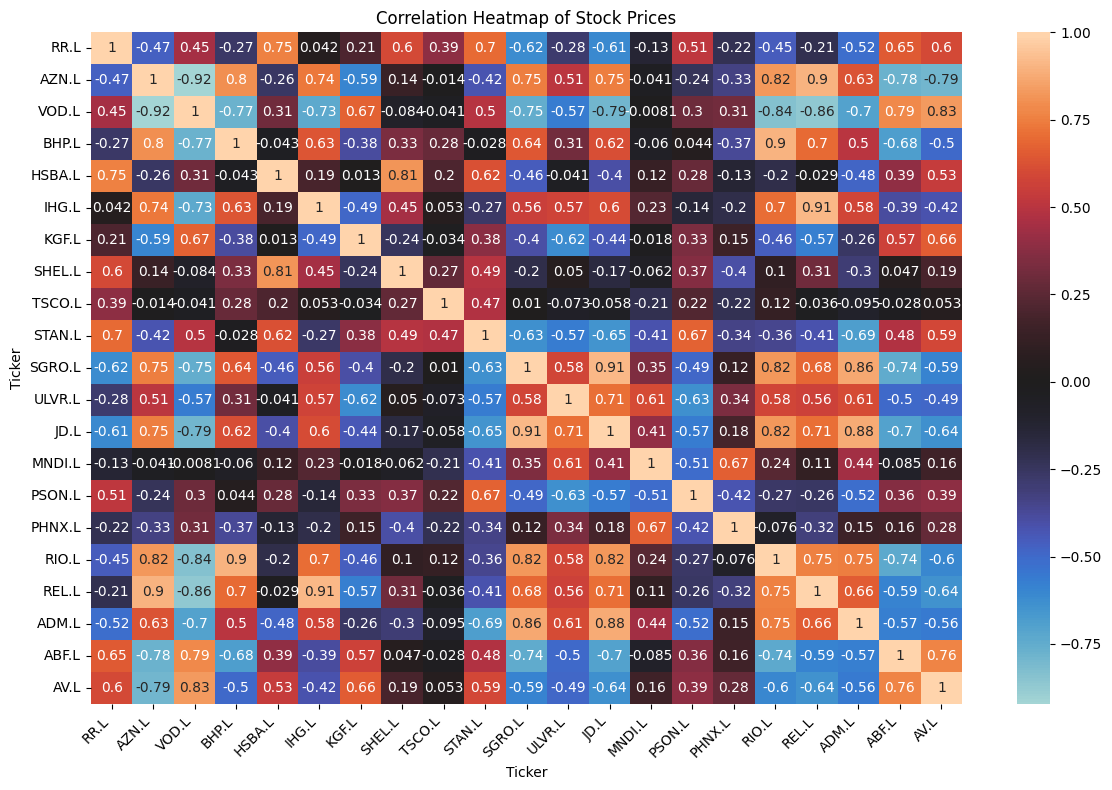

In [243]:
#correlation analysis

my_ticker = ['RR.L', 'AZN.L', 'VOD.L', 'BHP.L', 'HSBA.L', 'IHG.L', 'KGF.L','SHEL.L', 'TSCO.L', 'STAN.L',
          'SGRO.L', 'ULVR.L', 'JD.L', 'MNDI.L', 'PSON.L', 'PHNX.L', 'RIO.L', 'REL.L', 'ADM.L', 'ABF.L', 'AV.L'
          ]

# Download historical stock price data
START = "2014-01-01"
TODAY = date.today().strftime("%Y-%m-%d")
my_data = yf.download(my_ticker, START, TODAY)['Close']

df = my_data[my_ticker]
df.corr()

# Correlation matrix
corrMatrix = df.corr()

#Heat map for numerical data
plt.figure(figsize=(12, 8))
sns.heatmap(corrMatrix, annot=True, center=0)
plt.xticks(rotation=45, ha='right')
plt.title('Correlation Heatmap of Stock Prices')
plt.tight_layout()
plt.show()


In [244]:
#import plotly.express as px

# List of tickers
#my_ticker = ['GOOG', 'AAPL', 'MSFT', 'AMZN', 'META', 'TSLA', 'WMT', 'PG', 'NFLX', 'NVDA',
#             'NKE', 'UL', 'HSY', 'MA', 'IBM', 'F', 'INTC', 'PEP', 'BAC', 'C', 'WBD']

# Function to get market cap for a list of tickers
#def get_market_cap(tickers):
#    market_caps = []
#    for ticker in tickers:
#        stock = yf.Ticker(ticker)
#        info = stock.info
#        market_caps.append({
#            'Ticker': ticker,
#            'MarketCap': info['marketCap'],
#            'CompanyName': info['longName'],
#            'Sector': info.get('sector', 'N/A'),
#            'Industry': info.get('industry', 'N/A')
#        })
#    return market_caps

# Get market caps
#market_caps = get_market_cap(my_ticker)

# Convert to DataFrame
#df = pd.DataFrame(market_caps)

# Create a treemap
#fig = px.treemap(df,
#                 path=['Sector', 'Industry', 'CompanyName'],
#                 values='MarketCap',
#                 color='MarketCap',
#                 color_continuous_scale='rainbow',
#                 width=1000, height=700,
#                 title="Treemap of Stock Market Capitalizations")

# Show the plot
#fig.show()   #I tried to create a treemap something similar to whats available on yahoo finance.

In [245]:
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,594.736816,594.736816,581.184204,584.605225,265.267975,4187285
1,2014-01-03,584.473572,585.921021,581.940674,582.894714,264.491852,2639456
2,2014-01-06,582.500000,586.435486,577.631470,582.894714,264.491852,2940303
3,2014-01-07,582.894714,601.534180,580.328918,597.631470,271.178833,8168139
4,2014-01-08,599.473572,605.526306,596.184204,605.526306,274.761169,5792761
...,...,...,...,...,...,...,...
2655,2024-07-08,471.200012,478.399994,470.299988,475.500000,475.500000,5169582
2656,2024-07-09,473.500000,477.200012,468.500000,475.399994,475.399994,3386669
2657,2024-07-10,477.799988,483.100006,472.500000,483.100006,483.100006,5708928
2658,2024-07-11,482.500000,491.399994,479.899994,491.399994,491.399994,5833289


Text(0, 0.5, 'Price')

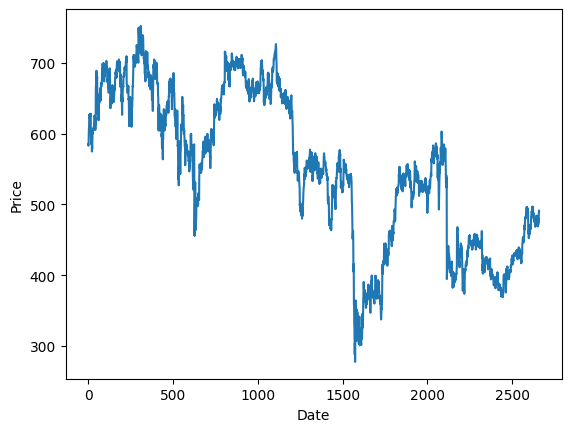

In [246]:
plt.plot(stock_data.Close)
plt.xlabel('Date')
plt.ylabel('Price')

In [247]:
#Find moving average of 100 days
ma_100 = stock_data.Close.rolling(100).mean()
print (ma_100)

#only after 1st 100 days it will give value

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2655    473.159002
2656    473.658002
2657    474.189002
2658    474.778002
2659    475.371002
Name: Close, Length: 2660, dtype: float64


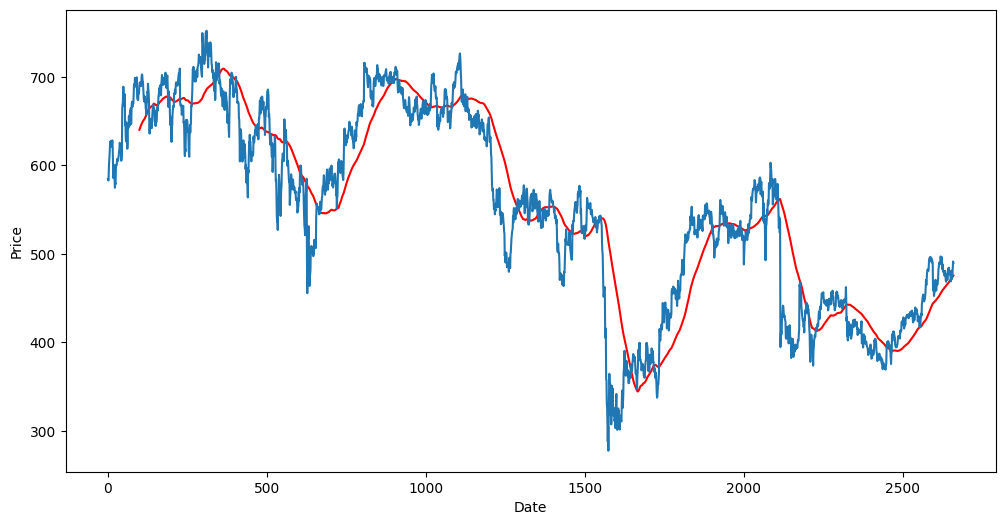

In [248]:
plt.figure(figsize=(12,6))
plt.plot(ma_100, 'r', label='100-day Moving Average')
plt.plot(stock_data.Close)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


In [249]:
#Find moving average of 200 days
ma_200 = stock_data.Close.rolling(200).mean()
print (ma_200)

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2655    445.190002
2656    445.576002
2657    446.021002
2658    446.491002
2659    446.975502
Name: Close, Length: 2660, dtype: float64


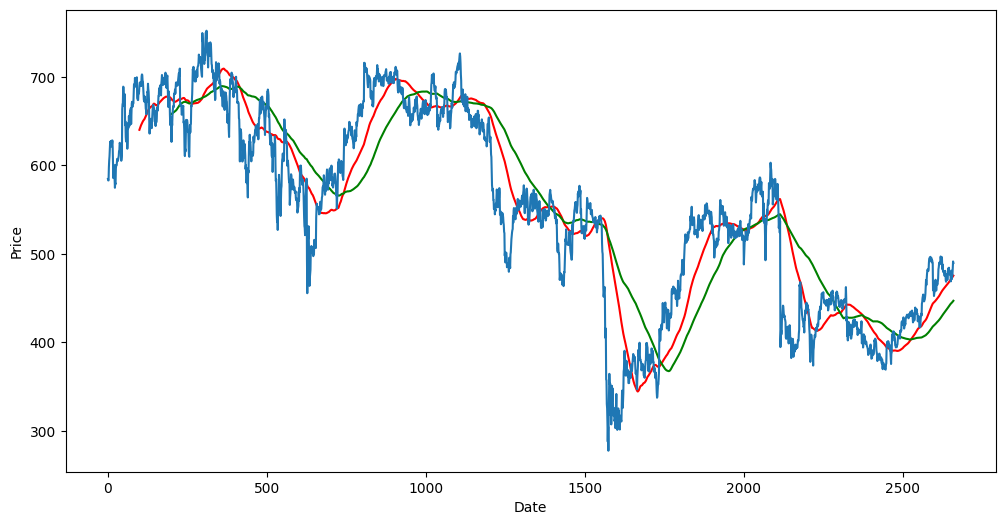

In [250]:
plt.figure(figsize=(12,6))
plt.plot(ma_100, 'r')
plt.plot(ma_200, 'g')
plt.plot(stock_data.Close)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [251]:
stock_data.dropna(inplace=True)

In [252]:
stock_data.shape

(2660, 7)

In [253]:
stock_data.drop('Date', axis=1, inplace=True )

In [254]:
# Splitting data into training and testing

data_training = pd.DataFrame(stock_data.Close[0:int(len(stock_data)*0.70)])
data_testing = pd.DataFrame(stock_data.Close[int(len(stock_data)*0.70): int(len(stock_data))])

print(data_training.shape)
print(data_testing.shape)

(1861, 1)
(799, 1)


In [255]:
#Feature Scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

data_training_scale = scaler.fit_transform(data_training)
data_training_scale

array([[0.64715686],
       [0.64355079],
       [0.64355079],
       ...,
       [0.56088785],
       [0.52565877],
       [0.53398072]])

In [256]:
#Lets create 2 arrays for array slicing

X_train = []
y_train = []

for i in range(100, data_training_scale.shape[0]):
    X_train.append(data_training_scale[i-100: i])
    y_train.append(data_training_scale[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [257]:
X_train.shape

(1761, 100, 1)

Model Building

In [258]:
#install librariers
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [259]:
model = Sequential()

model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [260]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_20 (LSTM)                  │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_21 (LSTM)                  │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_22 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_23 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [261]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train,y_train, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 122ms/step - loss: 0.1767
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - loss: 0.0183
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - loss: 0.0140
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - loss: 0.0143
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 129ms/step - loss: 0.0127
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 158ms/step - loss: 0.0144
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 146ms/step - loss: 0.0150
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 139ms/step - loss: 0.0112
Epoch 9/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - loss: 0.0115
Epoch 10/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 162ms/step - loss: 0.0102
Epoch 11/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 156ms/step - loss: 0.0121
Epoch 12/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 142ms/step - loss: 0.0085
Epoch 13/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - loss: 0.0087
Epoch 14/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 120ms/step - loss: 0.0092
Epoch 15/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - l

In [262]:
#testing 
#lets take last 100 days data from training set
past_100_days = data_training.tail(100)

data_testing = pd.concat([past_100_days, data_testing], ignore_index=True)

In [263]:
print(type(past_100_days))
print(type(data_testing))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [264]:
data_testing

,Close
0,432.500000
1,436.710510
2,429.078888
3,413.420990
4,418.026306
...,...
894,475.500000
895,475.399994
896,483.100006
897,491.399994


In [265]:
data_test_scale  =  scaler.fit_transform(data_testing)
data_test_scale

array([[0.27086617],
       [0.28888331],
       [0.25622693],
       [0.18922542],
       [0.20893197],
       [0.25566384],
       [0.26692465],
       [0.27086617],
       [0.26692465],
       [0.25115975],
       [0.25904213],
       [0.26805096],
       [0.37728025],
       [0.39023008],
       [0.38291066],
       [0.36658253],
       [0.36996044],
       [0.40149089],
       [0.39360837],
       [0.38234756],
       [0.39586048],
       [0.36883464],
       [0.37953236],
       [0.38797797],
       [0.38572586],
       [0.34180867],
       [0.37671703],
       [0.35588482],
       [0.3423719 ],
       [0.30746354],
       [0.33336306],
       [0.35870002],
       [0.42964252],
       [0.38966686],
       [0.34462387],
       [0.3519433 ],
       [0.34406078],
       [0.38065816],
       [0.39135587],
       [0.38291066],
       [0.44878585],
       [0.45948357],
       [0.45610527],
       [0.45835738],
       [0.4724334 ],
       [0.53042621],
       [0.5298635 ],
       [0.519

In [266]:
#Lets create 2 arrays for array slicing

X_test = []
y_test = []

for i in range(100, data_test_scale.shape[0]):
    X_test.append(data_test_scale[i-100: i])
    y_test.append(data_test_scale[i, 0])


X_test, y_test = np.array(X_test), np.array(y_test)

In [267]:
X_test.shape

(799, 100, 1)

In [268]:
y_predict = model.predict(X_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step


In [269]:
y_predict.shape

(799, 1)

In [270]:
y_test

array([0.68244676, 0.72242243, 0.71003517, 0.72467454, 0.68976618,
       0.69483349, 0.68976618, 0.70440476, 0.68638789, 0.67005976,
       0.74269168, 0.73537225, 0.74550688, 0.74438043, 0.74438043,
       0.7258002 , 0.73255705, 0.79505434, 0.75113729, 0.74212832,
       0.76971752, 0.76746541, 0.80349943, 0.79730645, 0.7849192 ,
       0.75564151, 0.76296119, 0.76352376, 0.7562046 , 0.75507815,
       0.76859107, 0.73931312, 0.73368272, 0.70553121, 0.71341373,
       0.71510248, 0.7623981 , 0.74719564, 0.73762436, 0.65992514,
       0.7004639 , 0.68244676, 0.65373138, 0.65485782, 0.63346239,
       0.62389086, 0.54168702, 0.56364555, 0.60305812, 0.60080601,
       0.5889825 , 0.61769736, 0.59348672, 0.60305812, 0.63346239,
       0.60080601, 0.60474753, 0.61713427, 0.63121028, 0.62445343,
       0.6672443 , 0.67400115, 0.68920309, 0.71059852, 0.78998651,
       0.81982781, 0.78773466, 0.77478483, 0.79223914, 0.7533894 ,
       0.75170038, 0.77647359, 0.78154142, 0.78998651, 0.74719

In [271]:
y_predict

array([[0.703776  ],
       [0.70600116],
       [0.70577127],
       [0.70446306],
       [0.7037594 ],
       [0.70268524],
       [0.7007202 ],
       [0.69761705],
       [0.69445074],
       [0.691245  ],
       [0.687269  ],
       [0.68591213],
       [0.6888466 ],
       [0.69596064],
       [0.70588833],
       [0.7169889 ],
       [0.72691196],
       [0.7341245 ],
       [0.7409136 ],
       [0.74672735],
       [0.75032556],
       [0.7526506 ],
       [0.7544094 ],
       [0.75765836],
       [0.7626829 ],
       [0.7684409 ],
       [0.77239317],
       [0.7732847 ],
       [0.771294  ],
       [0.76697946],
       [0.7613661 ],
       [0.7564298 ],
       [0.75181353],
       [0.74705565],
       [0.740669  ],
       [0.7329327 ],
       [0.7250129 ],
       [0.7207625 ],
       [0.72104263],
       [0.7248067 ],
       [0.7265943 ],
       [0.725071  ],
       [0.7198678 ],
       [0.71061695],
       [0.69844806],
       [0.68442607],
       [0.6697271 ],
       [0.653

In [272]:
scale =1/scaler.scale_
y_predict = y_predict*scale
y_test = y_test*scale

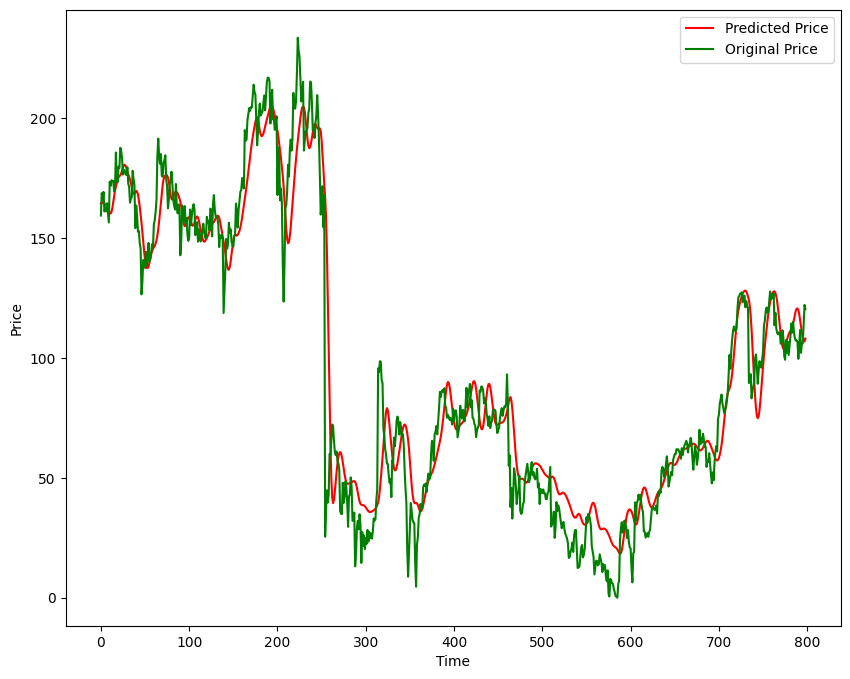

In [273]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y_test, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [274]:
model.save('Stock Prediction Model.keras')

In [275]:
#Evaluate data
y_true = y_test  # Actual target values 
y_pred = model.predict(X_test)  # Replace x_test with test data

# Calculate mean squared error
mse = mean_squared_error(y_true, y_pred)

print('Mean Squared Error:', mse)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
Mean Squared Error: 12588.06554135964
